# ML2 2.2 - Complex Machine Learning models & Keras Part 1

### This script contains the following:

#### 1. Importing Libraries
#### 2. Set Up Keras Model
#### 3. Cleaning Data
        Dropping Columns
        Fill in three observations with local data within the dataset
        Export (file to be used in later exercises)
        Keras Layer Model
        Split Data
#### 4. RNN
        Confusion Matrix

### 1. Importing Libraries

In [214]:
### 1. Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from numpy import unique
from numpy import reshape
from keras import utils

In [4]:
# Importing unscaled ClimateWins data

climatewins_original = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\DataSet\European Climate Assessment and Data Set Project.csv')

In [6]:
# Importing Pleasant Weather data

pleasant_weather = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\DataSet\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [8]:
# Creating Path

path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning'

### 2. Set Up Keras Model

###### I'll be running the RNN with LSTM. RNN is similar to CNN but works well with time components. While CNN works well with images. I want to see how well the looping works with determing pleasant weather with our data sets.

In [12]:
# Make a new model and this time start with an input shape

model = Sequential()
model.add(layers.Dense(2, activation='sigmoid', input_shape=(15,)))
model.add(layers.Dense(3))
model.add(layers.Dense(4))

C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# This model also has more layers

print(len(model.layers))

3


In [16]:
# Model weights are there even though the model hasn't been run yet

model.weights

[<Variable path=sequential/dense/kernel, shape=(15, 2), dtype=float32, value=[[ 0.16957152 -0.02725273]
  [ 0.46163917 -0.33149084]
  [ 0.07418078  0.0310123 ]
  [-0.5935027  -0.0763936 ]
  [ 0.55306184  0.15423185]
  [ 0.20598805  0.1354177 ]
  [ 0.19095826  0.1585514 ]
  [ 0.3900516  -0.09507504]
  [-0.29025695 -0.50720423]
  [-0.2704999   0.4584725 ]
  [-0.579708   -0.49273396]
  [-0.39667255 -0.22834292]
  [ 0.57648337 -0.00786197]
  [ 0.5356134  -0.43524355]
  [ 0.4208479   0.5542191 ]]>,
 <Variable path=sequential/dense/bias, shape=(2,), dtype=float32, value=[0. 0.]>,
 <Variable path=sequential/dense_1/kernel, shape=(2, 3), dtype=float32, value=[[-0.8328927   0.06951284 -0.26126665]
  [-0.39947397  0.07572758 -0.8707267 ]]>,
 <Variable path=sequential/dense_1/bias, shape=(3,), dtype=float32, value=[0. 0. 0.]>,
 <Variable path=sequential/dense_2/kernel, shape=(3, 4), dtype=float32, value=[[-0.25749177  0.57534313  0.49404705 -0.59601545]
  [-0.1674816  -0.20648044  0.13822174  0.3

In [18]:
# Now the model shows three layers, each of the type entered above, but there are no inputs yet.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

### 3. Cleaning Data

In [21]:
# Exploring size and shape of both data sets

In [23]:
climatewins_original.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [25]:
pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
climatewins_original.shape

(22950, 170)

In [29]:
pleasant_weather.shape

(22950, 16)

In [31]:
# Checking missing values, duplicats and comparing columns by list.

In [33]:
missing_values_climate = climatewins_original.isnull().sum()

In [35]:
print(missing_values_climate)

DATE                   0
MONTH                  0
BASEL_cloud_cover      0
BASEL_wind_speed       0
BASEL_humidity         0
                      ..
VALENTIA_snow_depth    0
VALENTIA_sunshine      0
VALENTIA_temp_mean     0
VALENTIA_temp_min      0
VALENTIA_temp_max      0
Length: 170, dtype: int64


In [37]:
missing_values_pleasant = pleasant_weather.isnull().sum()

In [39]:
print(missing_values_pleasant)

DATE                           0
BASEL_pleasant_weather         0
BELGRADE_pleasant_weather      0
BUDAPEST_pleasant_weather      0
DEBILT_pleasant_weather        0
DUSSELDORF_pleasant_weather    0
HEATHROW_pleasant_weather      0
KASSEL_pleasant_weather        0
LJUBLJANA_pleasant_weather     0
MAASTRICHT_pleasant_weather    0
MADRID_pleasant_weather        0
MUNCHENB_pleasant_weather      0
OSLO_pleasant_weather          0
SONNBLICK_pleasant_weather     0
STOCKHOLM_pleasant_weather     0
VALENTIA_pleasant_weather      0
dtype: int64


In [41]:
climate_dups = climatewins_original[climatewins_original.duplicated()]

In [43]:
climate_dups

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max


In [45]:
pleasant_dups = pleasant_weather[pleasant_weather.duplicated()]

In [47]:
pleasant_dups

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather


In [49]:
climate_list = climatewins_original.columns.tolist()

In [51]:
climate_list

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [53]:
pleasant_list = pleasant_weather.columns.tolist()

In [55]:
pleasant_list

['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

##### There are no missing values nor duplicates detected. When looking at the list for the pleasant weather data set it's missing GDANSK, ROMA and TOURS. These three weather stations will be dropped from the Climatewins data set. Further exploration determined that BELGRADE, BUDAPEST, HEARTHROM, MUNCHENB, STOCKHOLM AND VALENTIA (6) locations are missing the winds_speed observation and BELGRADE, BUDAPEST, DEBILT, KASSEL, LJUBLJANA, MAASTRICHT, MADRID, SONNBLICK AND STOCKHOLM (9) weather stations are missing the snow_depth observation. The columns for wind_speed and snow_depth will be removed for all weather stations. Additionally  KASSEL is missing the cloud_cover observation, MUNCHENB is missing the humidity observation and STOCKHOLM is missing the pressure observation. These missing observation will be substituded with their closest weather station: LJUBLJANA subs for KASSEL, SONNBLICK subs for MUNCHENB, and OSLO subs for STOCKHOLM. These findings will leave the data with 15 weather stations with 9 weather observations.

#### Dropping Columns       

In [59]:
# Dropping DATE, MONTH, three Weather stations, and two weather observations from each weather station.

In [61]:
climatewins_drops = climatewins_original.drop(columns=['DATE',
 'MONTH',
 'BASEL_wind_speed',
 'BASEL_snow_depth',
 'DEBILT_wind_speed',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_snow_depth',
 'HEATHROW_snow_depth',
 'KASSEL_wind_speed',
 'LJUBLJANA_wind_speed',
 'MAASTRICHT_wind_speed',
 'MADRID_wind_speed',
 'MUNCHENB_snow_depth',
 'OSLO_wind_speed',
 'OSLO_snow_depth',
 'SONNBLICK_wind_speed',
 'VALENTIA_snow_depth', 
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',])

In [63]:
pleasant_drops = pleasant_weather.drop(columns=['DATE'])

In [65]:
climatewins_drops.shape

(22950, 132)

In [67]:
pleasant_drops.shape

(22950, 15)

#### Fill in three observations with local data within the dataset for climatewins_d

In [70]:
# KASSEL is missing the cloud_cover observation, LJUBLJANA subs for KASSEL.

climatewins_drops['LJUBLJANA_cloud_cover_KASSEL'] = climatewins_drops['LJUBLJANA_cloud_cover']

In [72]:
# MUNCHENB is missing the pressure observation, SONNBLICK subs for MUNCHENB.

climatewins_drops['SONNBLICK_pressure_MUNCHENB'] = climatewins_drops['SONNBLICK_pressure']

In [74]:
# STOCKHOLM is missing the humidity observation, OSLO subs for STOCKHOLM.

climatewins_drops['OSLO_humidity_STOCKHOLM'] = climatewins_drops['OSLO_humidity']

In [76]:
climatewins_drops.shape

(22950, 135)

In [78]:
climatewins_drops_list = climatewins_drops.columns.tolist()

In [80]:
climatewins_drops_list

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [82]:
# Renaming column Kassel cloud cover

climatewins_drops.rename(columns = {'LJUBLJANA_cloud_cover_KASSEL' : 'KASSEL_cloud_cover'}, inplace = True)

In [84]:
# Renaming column Munchenb pressure

climatewins_drops.rename(columns = {'SONNBLICK_pressure_MUNCHENB' : 'MUNCHENB_pressure'}, inplace = True)

In [86]:
# Renaming column Stockholm humidity

climatewins_drops.rename(columns = {'OSLO_humidity_STOCKHOLM' : 'STOCKHOLM_humidity'}, inplace = True)

In [88]:
climatewins_drops_rename = climatewins_drops.columns.tolist()

In [90]:
climatewins_drops_rename

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


##### There are now a total of 15 weather stations with 9 observations each.

In [93]:
# Checking shape of both cleaned data sets before exporting

In [95]:
climatewins_drops.shape

(22950, 135)

In [97]:
pleasant_drops.shape

(22950, 15)

#### Export (this will be used in the next exercise)

In [100]:
climatewins_drops.to_csv(os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'ML2_2.2_Climatewins_cleaned.csv'))

In [101]:
pleasant_drops.to_csv(os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'ML2_2.2_Pleasant_cleaned.csv'))

#### Split Data

In [105]:
# Create an 'X' matrix

X = climatewins_drops
y = pleasant_drops

In [107]:
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [109]:
y

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
X = np.array(X.iloc[:,X.columns!=135])
y = np.array(y)

In [113]:
X

array([[7.    , 0.85  , 1.018 , ..., 8.    , 1.0304, 0.98  ],
       [6.    , 0.84  , 1.018 , ..., 6.    , 1.0292, 0.62  ],
       [8.    , 0.9   , 1.018 , ..., 8.    , 1.032 , 0.69  ],
       ...,
       [4.    , 0.76  , 1.0227, ..., 3.    , 1.0263, 0.85  ],
       [5.    , 0.8   , 1.0212, ..., 3.    , 1.0263, 0.94  ],
       [5.    , 0.84  , 1.0193, ..., 3.    , 1.0263, 0.97  ]])

In [115]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [117]:
X = X.reshape(-1,15,9)

In [119]:
X

array([[[ 7.0000e+00,  8.5000e-01,  1.0180e+00, ...,  6.5000e+00,
          8.0000e-01,  1.0900e+01],
        [ 1.0000e+00,  8.1000e-01,  1.0195e+00, ...,  3.7000e+00,
         -9.0000e-01,  7.9000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.4000e+00,
         -4.0000e-01,  5.1000e+00],
        ...,
        [ 1.0304e+00,  4.8000e-01,  1.0000e-02, ..., -3.2000e+00,
          5.0000e+00,  1.0114e+00],
        [ 5.0000e-02,  3.2000e-01,  0.0000e+00, ...,  5.0000e+00,
          8.8000e-01,  1.0003e+00],
        [ 4.5000e-01,  3.4000e-01,  4.7000e+00, ...,  8.0000e+00,
          1.0304e+00,  9.8000e-01]],

       [[ 6.0000e+00,  8.4000e-01,  1.0180e+00, ...,  6.1000e+00,
          3.3000e+00,  1.0100e+01],
        [ 6.0000e+00,  8.4000e-01,  1.0172e+00, ...,  2.9000e+00,
          2.2000e+00,  4.4000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.3000e+00,
          1.4000e+00,  3.1000e+00],
        ...,
        [ 1.0292e+00,  2.1000e-01,  6.1000e-01, ..., -

In [198]:
print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

Original X shape: (22950, 15, 9)
Original y shape: (22950, 15)


In [200]:
# Using Many-to-Many RNN output

y_for_many_to_many_model = y.reshape(y.shape[0], y.shape[1], 1)

In [202]:
print("Reshaped y for Many-to-Many RNN shape:", y_for_many_to_many_model.shape) # Should be (22950, 15, 1)

Reshaped y for Many-to-Many RNN shape: (22950, 15, 1)


In [204]:
# Splitting the data into training/testing

X_train, X_test, y_train, y_test = train_test_split(X, y_for_many_to_many_model, test_size=0.2, random_state=42)

In [206]:
print("\n--- After Train/Test Split (Many-to-Many) ---")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


--- After Train/Test Split (Many-to-Many) ---
X_train shape: (18360, 15, 9)
y_train shape: (18360, 15, 1)
X_test shape: (4590, 15, 9)
y_test shape: (4590, 15, 1)


###### The X and y are separated into samples, timesteps, features. 

### 4. RNN

In [216]:
# Running RNN #1

epochs = 30
batch_size = 32
n_hidden = 32

timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_output_features_per_timestep = 1

print(f"Timesteps for model: {timesteps}")
print(f"Input Dimension for model: {input_dim}")
print(f"Number of Classes for output layer: {n_output_features_per_timestep}")

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(n_output_features_per_timestep, activation='sigmoid')))
model.summary()

Timesteps for model: 15
Input Dimension for model: 9
Number of Classes for output layer: 1


C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 15, 32)              │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 15, 1)               │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,409 (21.13 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 0 (0.00 B)

In [218]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [220]:
print("\n--- Starting Model Training (Many-to-Many) ---")
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1)


--- Starting Model Training (Many-to-Many) ---
Epoch 1/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8255 - loss: 0.3668 - val_accuracy: 0.9090 - val_loss: 0.2072
Epoch 2/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9018 - loss: 0.2201 - val_accuracy: 0.9176 - val_loss: 0.1849
Epoch 3/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9110 - loss: 0.2002 - val_accuracy: 0.9230 - val_loss: 0.1714
Epoch 4/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9165 - loss: 0.1880 - val_accuracy: 0.9284 - val_loss: 0.1614
Epoch 5/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9216 - loss: 0.1776 - val_accuracy: 0.9337 - val_loss: 0.1534
Epoch 6/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9250 - loss: 0.1702 - val_accuracy: 0.9360 - val_loss: 0.1464
Epoch 7/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.1627 - val_accuracy: 0.9410 - val_loss: 0.1381
Epoch 8/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [222]:
print("\n--- Evaluating Model ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


--- Evaluating Model ---
Test Loss: 0.0585
Test Accuracy: 0.9787


###### A: The loss decreased, starting at about 0.3668 and decreasing to 0.0893. The accuracy increased, starting at 0.8255 and increasing to 0.9624. This means that the model is converging! A confusion matrix should also be accuratly confirming our findings. 

In [242]:
# Running RNN #2

epochs = 30
batch_size = 40
n_hidden = 38

timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_output_features_per_timestep = 1

print(f"Timesteps for model: {timesteps}")
print(f"Input Dimension for model: {input_dim}")
print(f"Number of Classes for output layer: {n_output_features_per_timestep}")

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(n_output_features_per_timestep, activation='softmax')))
model.summary()

Timesteps for model: 15
Input Dimension for model: 9
Number of Classes for output layer: 1


C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 15, 38)              │           7,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 15, 38)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 15, 1)               │              39 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,335 (28.65 KB)

 Trainable params: 7,335 (28.65 KB)

 Non-trainable params: 0 (0.00 B)

In [244]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [246]:
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=2)


--- Starting Model Training ---
Epoch 1/30


C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (40, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


459/459 - 2s - 5ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 2/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 3/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 4/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 5/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 6/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 7/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 8/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12.5872
Epoch 9/30
459/459 - 1s - 2ms/step - accuracy: 0.2161 - loss: 12.4965 - val_accuracy: 0.2105 - val_loss: 12

In [247]:
print("\n--- Evaluating Model ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


--- Evaluating Model ---
Test Loss: 12.5872
Test Accuracy: 0.2105


###### I've left the epochs at 30, increased the batch size to 40 and increased the hidden layers to 38 and changed the verbose to 2 and changed the activation function to softmax. This didn't provide great results at all. The loss started and stayed at 12.4965 and the accuracy stayed at 0.2161. I will go back to the activation function being sigmoid.

In [232]:
# Running RNN #3

epochs = 30
batch_size = 50
n_hidden = 44

timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_output_features_per_timestep = 1

print(f"Timesteps for model: {timesteps}")
print(f"Input Dimension for model: {input_dim}")
print(f"Number of Classes for output layer: {n_output_features_per_timestep}")

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(n_output_features_per_timestep, activation='sigmoid')))
model.summary()

Timesteps for model: 15
Input Dimension for model: 9
Number of Classes for output layer: 1


C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 15, 44)              │           9,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 15, 44)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 15, 1)               │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,549 (37.30 KB)

 Trainable params: 9,549 (37.30 KB)

 Non-trainable params: 0 (0.00 B)

In [234]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [236]:
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1)


--- Starting Model Training ---
Epoch 1/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8193 - loss: 0.3714 - val_accuracy: 0.9109 - val_loss: 0.2001
Epoch 2/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.2127 - val_accuracy: 0.9193 - val_loss: 0.1821
Epoch 3/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9137 - loss: 0.1933 - val_accuracy: 0.9248 - val_loss: 0.1688
Epoch 4/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9179 - loss: 0.1868 - val_accuracy: 0.9299 - val_loss: 0.1593
Epoch 5/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.1707 - val_accuracy: 0.9365 - val_loss: 0.1469
Epoch 6/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9303 - loss: 0.1618 - val_accuracy: 0.9413 - val_loss: 0.1387
Epoch 7/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9338 - loss: 0.1538 - val_accuracy: 0.9433 - val_loss: 0.1318
Epoch 8/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 

In [238]:
print("\n--- Evaluating Model ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


--- Evaluating Model ---
Test Loss: 0.0642
Test Accuracy: 0.9761


###### In this 3rd run of RNN I've left the epoch at 30, increased the batch size to 50 and increased the hidden layers to 44 and reduced the verbose to 1. Our loss started around the same place as our first RNN at 0.3714 and gradually decreased to 0.0789 which is the lowest loss we've seen. The accuracy started slightly lower at 0.8193 but increased to 0.9678 which is almost equal but slightly better than the accuarcy of the first RNN we ran.

#### Confusion Matrix

In [252]:
# Importing Library for Confusion Matrix

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [254]:
locations = list({x.split("_")[0] for x in climatewins_drops.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [256]:
# Getting predictions from training RNN model

y_pred_proba = model.predict(X_test)

113/144 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step

C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\jmesi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [258]:
# Converting probabilities to binary predictions (0 or 1) 

y_pred_binary = (y_pred_proba > 0.5).astype(int)

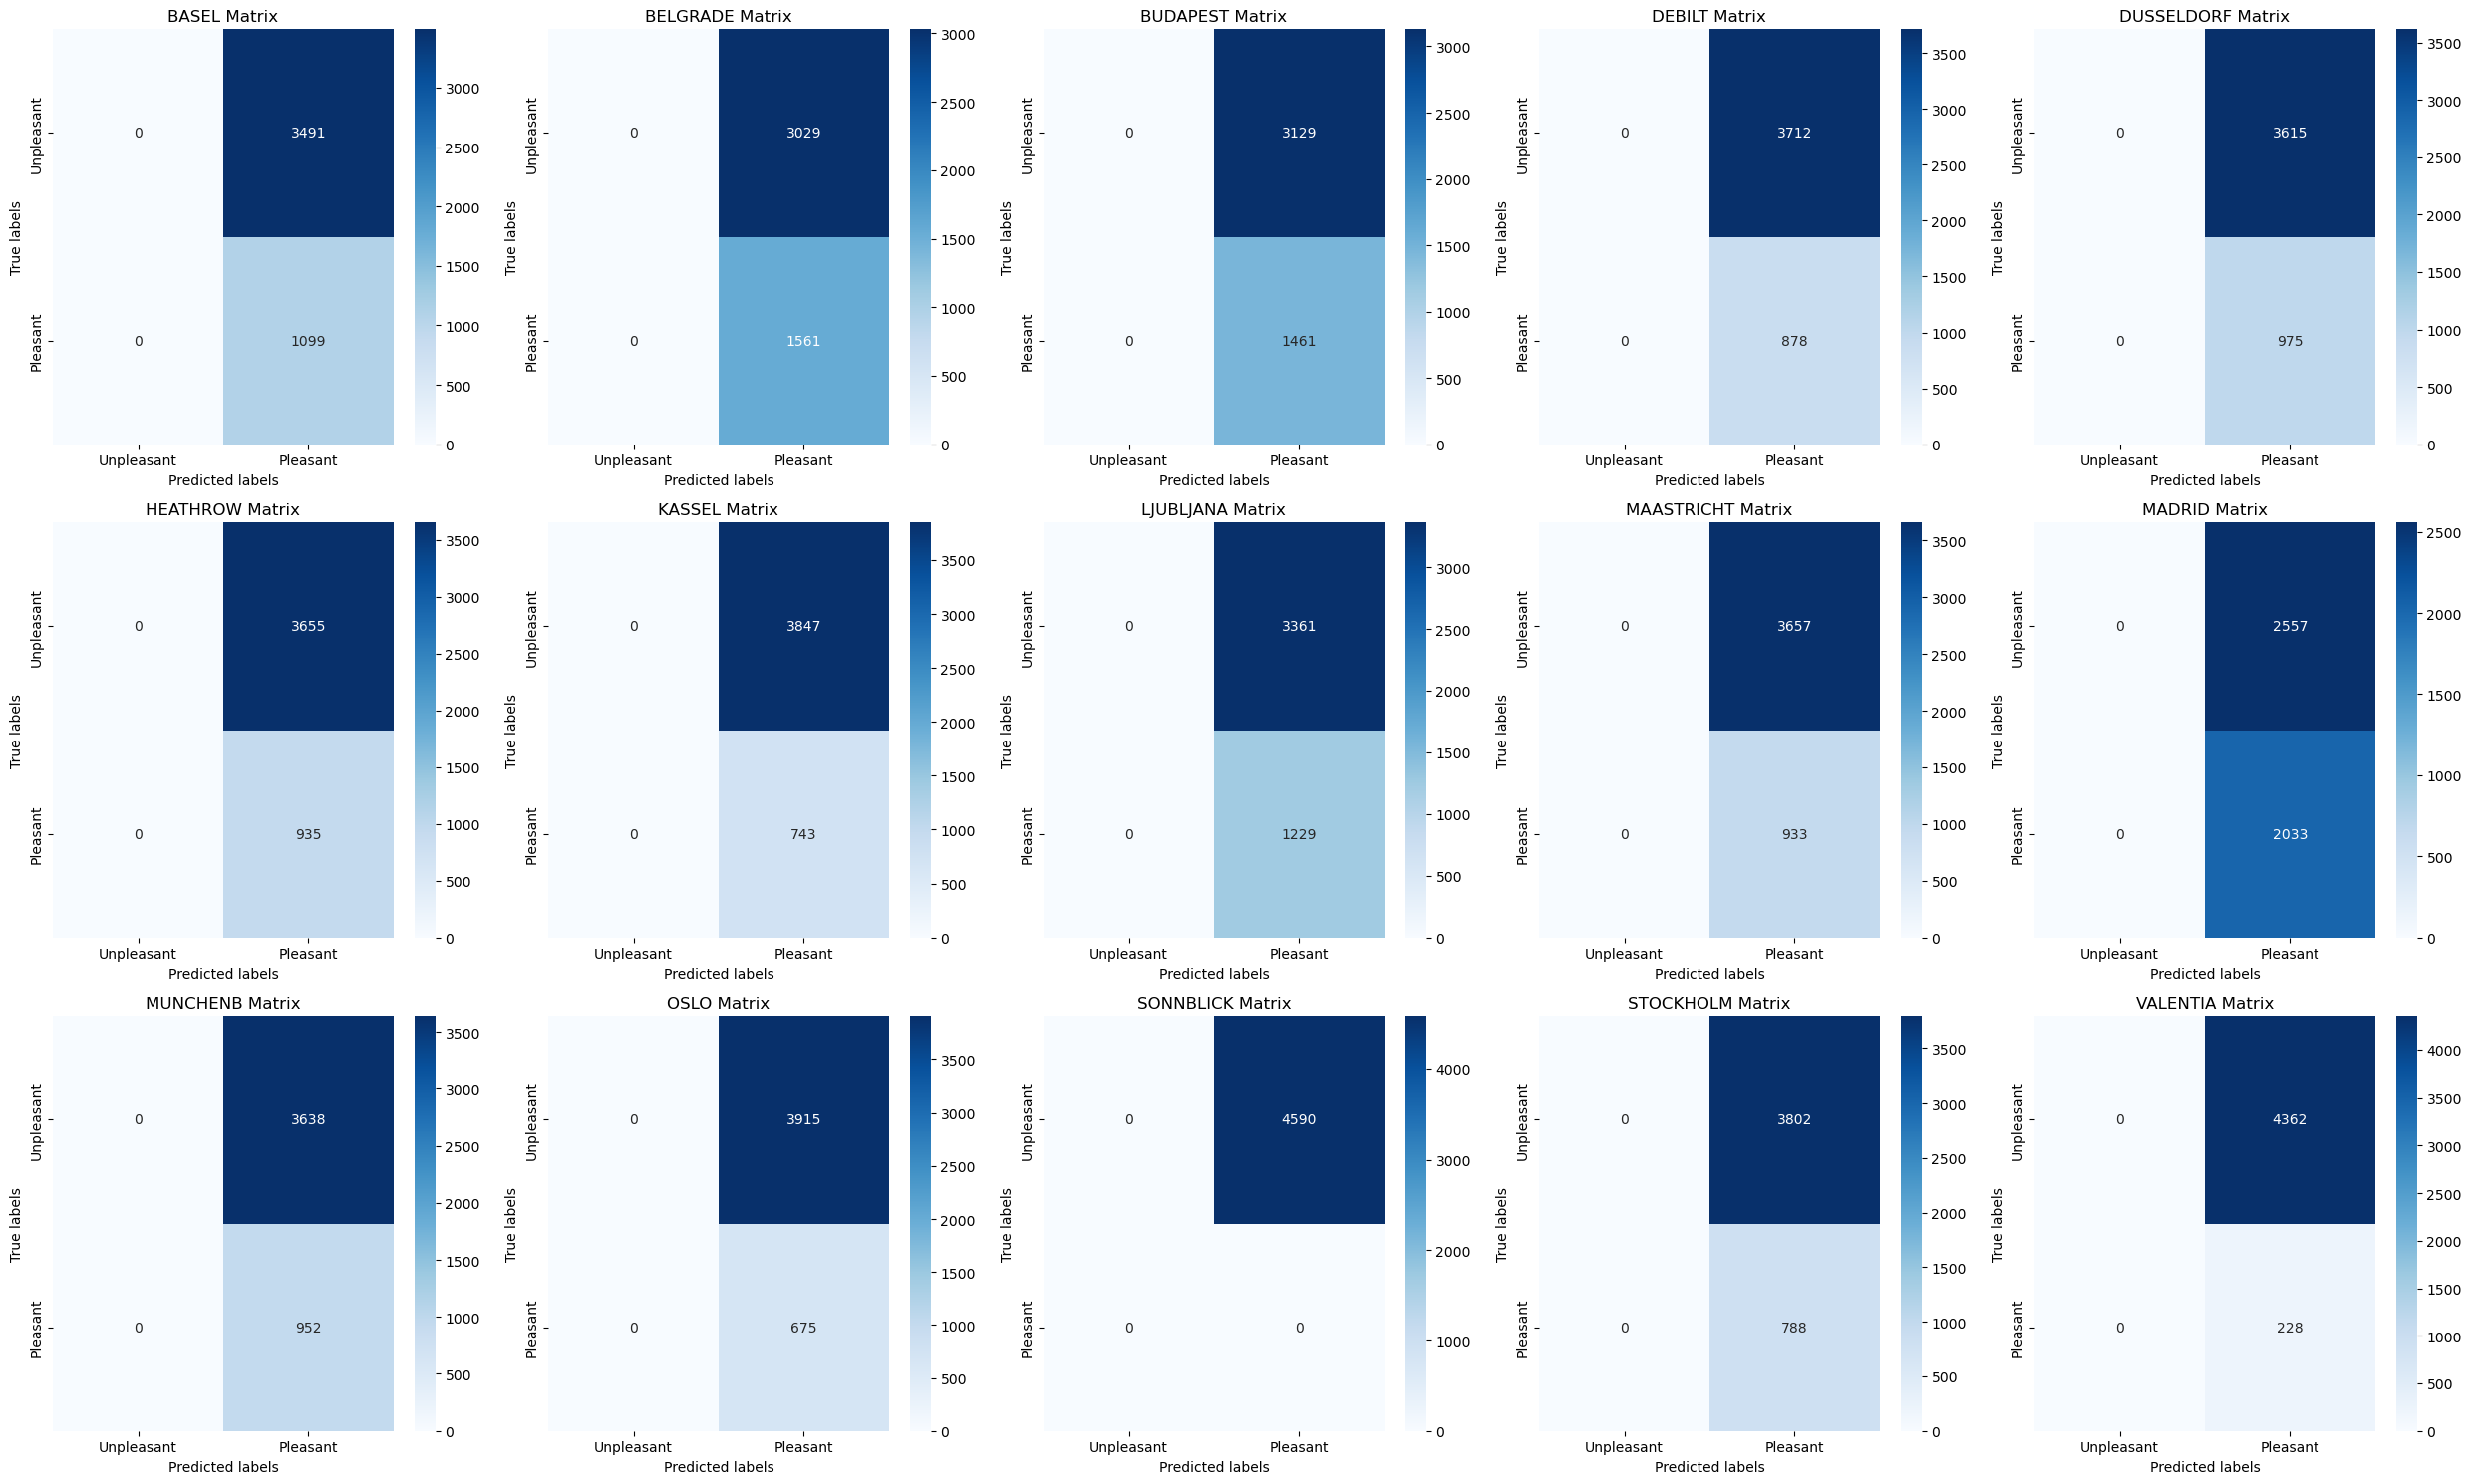

In [262]:
figure, ax = plt.subplots(3, 5, figsize=(25, 15)) # 3 rows, 5 columns for 15 plots
labels = ['Unpleasant', 'Pleasant']
count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]

        true_labels_for_station = y_test[:, count, 0]

        predicted_labels_for_station = y_pred_binary[:, count, 0]

        cm = confusion_matrix(true_labels_for_station, predicted_labels_for_station)

        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], cmap='Blues');
        
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name + ' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        
        count += 1

plt.tight_layout()
plt.savefig("ML2_2.2_Confusion_Matrix_RNN_Per_Station.png")
plt.show()

###### This multi-confusion matrix presents very odd. This is exclusively predicting unpleasant days (unpleasant,pleasant) over pleasant days (pleasant,pleasant). This could be derived from the pleasant data set having mostly 0s or unpleasant weather over 1s or pleasant weather. 